---
layout: post
title:  Structured Model for AI
date:   2025-09-06
categories: [Python, AI]
mermaid: true
typora-root-url: /Users/ojitha/GitHub/ojitha.github.io
typora-copy-images-to: ../assets/images/${filename}
---

Breif introduction

<!--more-->

------

* TOC
{:toc}
------

## Introduction
I'll dive into researching why Python type annotations are particularly important for AI agent development with frameworks like LangGraph and AutoGen. This is a great technical question that touches on both software engineering best practices and the specific needs of AI agent frameworks.

Type annotations have evolved from optional documentation to architectural foundations in AI agent development, enabling 
- automatic schema generation, 
- runtime validation, and 
- sophisticated error handling 

that traditional Python development rarely requires. Modern AI frameworks like LangGraph and AutoGen depend on type annotations not just for developer experience, but for core functionality including 
- tool registration, 
- state management, and 
- LLM integration

Unlike typical Python applications, AI agents must seamlessly translate between Python objects and JSON schemas for LLM function calling, manage *complex conversational state across multiple interactions, and handle unpredictable inputs from language models*.
Pydantic AI[^1] Type annotations provide the metadata and contracts necessary to make these translations reliable, automatic, and error-free.

```mermaid
---
config:
  securityLevel: loose
  theme: forest
  look: handDrawn
---
mindmap
  (("Type 
  Annotation"))
    ["1 Tool and Function Schema Definition"]
    ["2 Structured Data Flow Between Agents"]
    ["3 LangGraph State Management"]
    ["4 Runtime Validation and Error Prevention"]
    ["5 LLM Function Calling Integration"]
```

Python type annotations play a crucial role in AI agent development, especially with frameworks like LangGraph and AutoGen:

1. Tool and Function Schema Definition: AI agents frequently need to call external tools and functions. Type annotations provide the schema information that frameworks

```python
from typing import List, Dict
from pydantic import BaseModel

class WeatherQuery(BaseModel):
    location: str
    days: int = 1

def get_weather(query: WeatherQuery) -> Dict[str, any]:
    """Get weather information for a location"""
    # Implementation here
    pass
```
The framework can automatically generate OpenAPI schemas or function calling specifications from these annotations, which LLMs need to understand how to invoke tools correctly.

2. Structured Data Flow Between Agents: In multi-agent systems like AutoGen, agents pass structured data between each other. Type annotations ensure:

```python
from dataclasses import dataclass
from typing import Optional

@dataclass
class AgentMessage:
    content: str
    sender: str
    message_type: str
    metadata: Optional[Dict[str, any]] = None

def process_agent_response(message: AgentMessage) -> AgentMessage:
    # Framework knows exactly what structure to expect
    pass
```
The framework can automatically generate OpenAPI schemas or function calling specifications from these annotations, which LLMs need to understand how to invoke tools correctly.

3. LangGraph State Management: LangGraph uses typed state objects to manage data flow through graph nodes.

```python
from typing import TypedDict, List
from langgraph.graph import StateGraph

class AgentState(TypedDict):
    messages: List[str]
    current_step: str
    context: Dict[str, any]
    
def reasoning_node(state: AgentState) -> AgentState:
    # LangGraph validates state structure automatically
    return {
        "messages": state["messages"] + ["New reasoning step"],
        "current_step": "analysis",
        "context": state["context"]
    }
```
4. Runtime Validation and Error Prevention: Type annotations enable runtime validation libraries like Pydantic to catch errors early:

```python
from pydantic import BaseModel, validator

class LLMResponse(BaseModel):
    reasoning: str
    confidence: float
    next_action: str
    
    @validator('confidence')
    def confidence_must_be_valid(cls, v):
        if not 0 <= v <= 1:
            raise ValueError('Confidence must be between 0 and 1')
        return v
```

5. LLM Function Calling Integration: Modern LLMs support function calling, and frameworks automatically convert type annotations to JSON schemas:

```pyhton
def search_database(
    query: str,
    filters: Dict[str, str],
    limit: int = 10
) -> List[Dict[str, any]]:
    """Search database with specified filters"""
    pass

# Framework auto-generates:
# {
#   "name": "search_database",
#   "parameters": {
#     "type": "object",
#     "properties": {
#       "query": {"type": "string"},
#       "filters": {"type": "object"},
#       "limit": {"type": "integer", "default": 10}
#     }
#   }
# }
```

### AI demands typing

AI agent development presents unique challenges that make type *annotations essential rather than optional*. <span>**State persistence across conversations** requires precise data contracts</span>{:gtxt} - a chat agent might maintain user context, conversation history, tool results, and metadata across multiple exchanges. *Without typing, state corruption becomes inevitable as different components make incompatible assumptions about data structures*{:rtxt}.

**LLM integration introduces unpredictability** that typed interfaces help contain. Language models can return unexpected JSON structures, miss required fields, or provide data in wrong formats.

> Type validation catches these issues immediately rather than allowing them to propagate through the system, causing failures in downstream components. 
{:.green}

**Tool and function calling** represents perhaps the most critical difference. AI agents must dynamically convert Python function signatures to JSON schemas that LLMs can understand and invoke. This translation process relies entirely on type annotations - without them, automatic schema generation becomes impossible, forcing developers into manual JSON schema maintenance that quickly becomes unwieldy.


## Type Hints

1. Simple types like int, float, str, and bytes may be used directly in type hints.
2. Concrete classes from the standard library, external packages, or user defined may also be used in type hints.
3. As of Python 3.10, there is no good way to annotate `array.array`.
4. Generic types can be declared with type parameters
5. To provide the initial support for generic type hints, the authors of PEP 484 created dozens of generic types in the typing module such as `typing.List`, `typing.Set` and so on.
6. In practice, if you want to annotate numeric arguments for static type checking, use one of the concrete types `int`, `float`, or `complex`—as recommended by PEP 488.

I am using the following version of Python to create this post:

In [11]:
%%bash
Python -V

Python 3.12.11


Current project settings are:

In [18]:
import tomllib
import json

with open("../pyproject.toml", "rb") as f:
    data = json.dumps(tomllib.load(f), indent=4)

print(f'pyproject.tom is \n {data}')    

pyproject.tom is 
 {
    "project": {
        "name": "python",
        "version": "0.1.0",
        "description": "Add your description here",
        "readme": "README.md",
        "requires-python": ">=3.12.11",
        "dependencies": [
            "aiohttp>=3.12.15",
            "ipykernel>=6.30.1",
            "jupyter>=1.1.1",
            "pydantic>=2.11.7"
        ]
    }
}


Load the API keys:

In [ ]:
%load_ext dotenv
%dotenv ../../../.env

In the following code you have to use `Optional[str] = None`, otherwise, `None` is not assignable.

In [ ]:
from typing import Optional
def method(a: int, b: str, c: Optional[str] = None) -> str:
    return "..."

Python 3.10 added support for using `|` to indicate alternative types, as a more readable, concise alternative to the `Union[atype, btype, ...]` notation. The `|` operator[^3] can also be used to replace `Optional[atype]` with `atype |` None.

In [13]:
def method(a: int, b: str, c: str | None = None) -> str:
    return "..."

### Important Annotations
Major types[^2] you can use with annotations

- `typing.Any`
- Simple types and classes
- `typing.Optional` and `typing.Union`
- Generic collections, including tuples and mappings
- Abstract base classes
- Generic iterables
- Parameterized generics and `TypeVar`
- `typing.Protocols`—the key to _static duck typing_
- `typing.Callable`
- `typing.NoReturn`—a good way to end this list


In [3]:
from typing import Callable 
str_predicate_function: Callable[[str | bytes], bool]

#### Any Type
The type checker assumes the `Any` type when it cannot determine the type of an object but *does not catch type errors at runtime*. Therefore, *annotations are always optional at all the levels*{:gtxt}.

> The Any type is considered compatible with all other types.
{:.green}

`Any` is a magic type that sits at the top and the bottom of the type hierarchy.

In [ ]:
from typing import Any

def method(a: Any) -> Any:
    return "..."

But if you run the following, you get the type checking warning: <span>Operator "*" not supported for types "object" and "Literal[2]"</span>{:rtxt}.

> `None` is a special type that represents the absence of a value. It is a subtype of any other type, including itself.

In [ ]:
def method(a: object) -> object:
    return a * 2 # warning 

#### Tuple Types

Ways to annotate tuple types:

1. Tuples as records
2. Tuples as records with named fields
3. Tuples as immutable sequences

 Tuples as records:

In [15]:
employee: tuple[str, int] = ("John Doe", 30)  # tuple of string and integer

In [ ]:
t: tuple[int, str, float] = (1, 'book', 3.14)  # tuple of int, string, and float

Tuples as records with named fields:

In [25]:
from typing import NamedTuple

class Item(NamedTuple):
    name: str
    price: float
    id: int
    
def accessBook(book: Item) -> None:
    print(f"Book: {book.name}, Price: {book.price}, ID: {book.id}") 

item = Item("Fluent Python, 3rd Edition", 129.99, 12345)
accessBook(item)
       

Book: Fluent Python, 3rd Edition, Price: 129.99, ID: 12345


Tuples as immutable sequences:

> The annotations `stuff: tuple[Any, ...]` and `stuff: tuple` mean the same thing: stuff is a tuple of unspecified length with objects of any type.

In [ ]:
def findAnimals(animals: str) -> tuple[str, ...]:
    return tuple(animals.split())

animal_string = 'drake fawn heron ibex koala lynx tahr xerus yak zapus'.split()
print(findAnimals(' '.join(animal_string)))

('drake', 'fawn', 'heron', 'ibex', 'koala', 'lynx', 'tahr', 'xerus', 'yak', 'zapus')


> The annotations `stuff: list` and `stuff: list[Any]` is the same.

#### Mappings

Generic mapping types are annotated as `MappingType[KeyType, ValueType]`. In general it’s better to use abstract classes such as `abc.Mapping` or `abc.MutableMapping` in parameter type hints, instead of `dict` (or `typing.Dict` in legacy code for the versions before the Python 3.9). Remember that most ABCs from `collections.abc` and other concrete classes from collections, as well as built-in collections, support generic type hint notation like `collections.deque[str]` starting with Python 3.9.

> The corresponding `typing` collections are only needed to support code written in Python 3.8 or earlier.
{:.yellow}

**TypeAlias** is a special annotation introduced in Python 3.10 (PEP 613) that explicitly marks a variable assignment as creating a type alias. It helps clarify intent and improves type checker support.

In [34]:
from typing import TypeAlias

# Explicitly mark as type alias
UserId: TypeAlias = int
Matrix: TypeAlias = list[list[float]] # demostration only

# Use the aliases
def get_user(user_id: UserId) -> dict[str, UserId | str]:
    return {"id": user_id, "name": "John"}

## TypedDict

It’s tempting to use `TypedDict` to protect against errors while handling dynamic data structures like JSON API responses. Although syntatically `TypeDict` is similar to the `typing.NamedTuple` it is different:

In [29]:
from typing import TypedDict

class Book(TypedDict):
    title: str
    authors: list[str]
    year: int
    price: float

fluent_python: Book = Book(
    title="Fluent Python, 2nd Edition",
    authors=["Luciano Ramalho"],
    year=2022,
    price=129.99
)
# In the runtime, TypeDict is a regular dict, so you can use it as such:
fluent_python

{'title': 'Fluent Python, 2nd Edition',
 'authors': ['Luciano Ramalho'],
 'year': 2022,
 'price': 129.99}

## Pydantic

Pydantic[^4] is a Python library that provides data validation and serialization using Python type hints. Here are its main uses and benefits:
- **Data validation**: Automatically validates data types and formats
- **Type safety**: Enforces type annotations at runtime
- **Data parsing**: Converts and coerces data types when possible
- **Serialization**: Converts Python objects to JSON/dict and vice versa

In [28]:
from pydantic import BaseModel
from typing import Optional
from pprint import pprint

class Address(BaseModel):
    street: str
    city: str
    country: str
    
class Person(BaseModel):
    name: str
    age: Optional[int] = None
    addresses: list[Address]

class User(Person):
    user_id: int
    email: str

address_1 = Address(street="123 Main St", city="NYC", country="USA")
address_2 = Address(street="456 Elm St", city="LA", country="USA")

# Automatic validation
user = User(user_id="123"
            , name="John"
            , email="john@email.com"
            , addresses=[address_1, address_2])


print(f'{user.user_id = }')
pprint(user.model_dump())  

user.user_id = 123
{'addresses': [{'city': 'NYC', 'country': 'USA', 'street': '123 Main St'},
               {'city': 'LA', 'country': 'USA', 'street': '456 Elm St'}],
 'age': None,
 'email': 'john@email.com',
 'name': 'John',
 'user_id': 123}


Here the class hierarchy:

```mermaid
classDiagram
    class object
    class BaseModel
    class Person
    class User
    
    object <|-- BaseModel
    BaseModel <|-- Person
    Person <|-- User
```

In [29]:
for cls in type(user).mro():
    print(f'{cls.__module__}.{cls.__name__}')

__main__.User
__main__.Person
pydantic.main.BaseModel
builtins.object


PyDantic has its own types such as `EmailStr` and validations (eg: `ValidationError`).

In [10]:
from pydantic import BaseModel, EmailStr, ValidationError

class UserRequest(BaseModel):
    name: str
    email: EmailStr
    query: str

In the following defintion, demostrate the valid `UserRequest`:

In [49]:
user_request = UserRequest(
    name="John Doe",
    email="john.d@example.org",
    query="How to use Pydantic?"
)


You can validate programmatically:

In [48]:

def validate_input(request: dict[str, str | EmailStr]) -> UserRequest | None  :
    try:
        # Attempt to create a UserRequest model instance from user input data
        input = UserRequest(**request)
        print(f"✅ Valid user request:")
        print(f"{input.model_dump_json(indent=2)}")
        return input
    except ValidationError as e:
        # Capture and display validation errors in a readable format
        print(f"❌ Validation error occurred:")
        for error in e.errors():
            print(f"  - {error['loc'][0]}: {error['msg']}")
        return None
    
user_request_invalid = {
    "name": "John Doe",
    "email": "invalid-email",
    "query": "How to use Pydantic?"
}

validate_input(user_request_invalid)


❌ Validation error occurred:
  - email: value is not a valid email address: An email address must have an @-sign.


Let us recreate the `UserRequest` with name, email and query to the LLM. As you see, user age is optional and between 1 to 150.

> Pydantic uses the `Field()` metadata for runtime validation.
{:.green}

In [34]:
from pydantic import Field
from typing import Optional

class UserRequest(BaseModel):
    name: str
    email: EmailStr
    query: str
    age: Optional[int] = Field(
        default=None
        , description="User age should be > 0 and less than 150"
        , title="User age"
        , ge=1
        , le=150
        )

Example of invalid `UserRequest`:

In [35]:
user_request = UserRequest(
    name="John Doe",
    email="john.d@example.org",
    query="How to use Pydantic?"
    , age=0
)

ValidationError: 1 validation error for UserRequest
age
  Input should be greater than or equal to 1 [type=greater_than_equal, input_value=0, input_type=int]
    For further information visit https://errors.pydantic.dev/2.11/v/greater_than_equal

Above `user_request` is invalid because age is 0 which should be greater than 0 as follows:

In [18]:
user_request = UserRequest(
    name="John Doe",
    email="john.d@example.org",
    query="How to use Pydantic?"
    , age=30
)

user_reqest_json = user_request.model_dump_json()
user_reqest_json


'{"name":"John Doe","email":"john.d@example.org","query":"How to use Pydantic?"}'

You can check the class structure of the `UserRequest`:

In [ ]:
for cls in type(user_request).mro():
    print(f'{cls.__module__}.{cls.__name__}')

__main__.UserRequest
pydantic.main.BaseModel
builtins.object


You can use `PyDantic_ai` to directly use the models: 

In [30]:
from pydantic_ai import Agent
import nest_asyncio
nest_asyncio.apply()

prompt = """
You are a helpful assistant. 
Please provide the user's name, email, and query.
""".strip()

agent = Agent(
    model="gpt-4o-mini",
    output_type=UserRequest,
)

prompt = (
    f"Analyze the following customer query {user_request} "
    f"and provide a structured response."
)
response= agent.run_sync(prompt)

In [32]:
# Print out the repsonse type and content
print(f'{type(response.output) =}'
   ,f'{response.output.model_dump_json(indent=2) = }'
   ,sep='\n')

type(response.output) =<class '__main__.UserRequest'>
response.output.model_dump_json(indent=2) = '{\n  "name": "John Doe",\n  "email": "john.d@example.org",\n  "query": "How to use Pydantic?"\n}'


In the real world, you have have to validate the JSON string such as `user_reqest_json` with `UserRequest` schema:

In [ ]:
UserRequest.model_validate_json(user_reqest_json)

UserRequest(name='John Doe', email='john.d@example.org', query='How to use Pydantic?', age=30)

You can print the schema of the model in JSON format:

In [63]:
user_request.model_json_schema()

{'properties': {'name': {'title': 'Name', 'type': 'string'},
  'email': {'format': 'email', 'title': 'Email', 'type': 'string'},
  'query': {'title': 'Query', 'type': 'string'},
  'age': {'anyOf': [{'maximum': 150, 'minimum': 1, 'type': 'integer'},
    {'type': 'null'}],
   'default': None,
   'description': 'User age should be > 0 and less than 150',
   'title': 'User age'}},
 'required': ['name', 'email', 'query'],
 'title': 'UserRequest',
 'type': 'object'}

The new class which is extended from the `UserRequest` is `UserInput` which has been taken from the very good course [Pydantic for LLM Workflows - DeepLearning.AI][course_1]{:target="_blank"}. The below code shows how to use the `pydantic.field_validator` to validate the `pydantic.Field` defintion:

In [38]:
# Define your UserInput model
from pydantic import field_validator
from datetime import date

class UserInput(UserRequest):
    order_id: Optional[str] = Field(
        None,
        description="Order ID if available (format: ABC-12345)"
    )
    # Validate order_id format (e.g., ABC-12345)
    @field_validator("order_id")
    def validate_order_id(cls, order_id: Optional[str]) -> str | None:
        import re
        if order_id is None:
            return order_id
        pattern = r"^[A-Z]{3}-\d{5}$"
        if not re.match(pattern, order_id):
            raise ValueError(
                "order_id must be in format ABC-12345 "
                "(3 uppercase letters, dash, 5 digits)"
            )
        return order_id
    purchase_date: Optional[date] = None


Now define the `CustomerQuery` data model as explained in the [Pydantic for LLM Workflows - DeepLearning.AI][course_1]{:target="_blank"}:

In [40]:
from typing import Literal
# Define your CustomerQuery model
class CustomerQuery(UserInput):
    priority: str = Field(
        ..., description="Priority level: low, medium, high"
    )
    category: Literal[
        'refund_request', 'information_request', 'other'
    ] = Field(..., description="Query category")
    is_complaint: bool = Field(
        ..., description="Whether this is a complaint"
    )
    tags: list[str] = Field(..., description="Relevant keyword tags")

Lets create the customer query (as in the [Pydantic for LLM Workflows - DeepLearning.AI][course_1]{:target="_blank"}):

In [42]:
# Define a function to call an LLM using Pydantic AI to create an instance of CustomerQuery
def create_customer_query(valid_user_json: str) -> CustomerQuery:
    customer_query_agent = Agent(
        model="gpt-4o",
        output_type=CustomerQuery,
    )
    response = customer_query_agent.run_sync(valid_user_json)
    print("CustomerQuery generated...")
    return response.output

Let's create the 

In [47]:
# Define user input JSON data
user_input_json = '''
{
    "name": "John Doe",
    "email": "John.D@example.com",
    "query": "When can I expect delivery of the laptop I ordered?",
    "order_id": "ABC-12345",
    "purchase_date": "2025-12-01"
}
'''

customer_query = create_customer_query(user_input_json)

print(type(customer_query))
print(customer_query.model_dump_json(indent=2))

CustomerQuery generated...
<class '__main__.CustomerQuery'>
{
  "name": "John Doe",
  "email": "John.D@example.com",
  "query": "When can I expect delivery of the laptop I ordered?",
  "age": null,
  "order_id": "ABC-12345",
  "purchase_date": "2025-12-01",
  "priority": "medium",
  "category": "information_request",
  "is_complaint": false,
  "tags": [
    "delivery",
    "order",
    "laptop"
  ]
}


Here the class Hierarcy:

```mermaid
classDiagram
    class object
    class BaseModel
    class UserRequest
    class UserInput
    class CustomerQuery
    
    object <|-- BaseModel
    BaseModel <|-- UserRequest
    UserRequest <|-- UserInput
    UserInput <|-- CustomerQuery
```

In [46]:
for cls in type(customer_query).mro():
    print(f'{cls.__module__}.{cls.__name__}')

__main__.CustomerQuery
__main__.UserInput
__main__.UserRequest
pydantic.main.BaseModel
builtins.object


As explain above, key benefits of using PyDantic are:

- Runtime Type Checking: Validates data at runtime, not just static analysis
- Automatic Coercion: Converts compatible types (string "123" → int 123)
- Rich Error Messages: Detailed validation error descriptions
- JSON Schema Generation: Automatically generates JSON schemas
- IDE Support: Full type hints support for better autocomplete
- Performance: Fast validation using Rust under the hood (Pydantic v2)

### Annotated
Annotated is a special typing construct in Python that allows you to attach metadata to type hints without affecting the actual type checking behavior.

The core idea is to separate *type information* (for type checkers like mypy) from metadata (for runtime tools, documentation, validation, etc.). Before Annotated, you had to choose between having clean type hints or adding metadata - you couldn't have both cleanly.

In [51]:
from typing import Annotated

# Basic syntax: Annotated[Type, metadata1, metadata2, ...]
UserId = Annotated[int, "A unique identifier for users"]

Annotated can be use with the PyDantic:

In [52]:
from typing import Annotated

# For validation libraries like Pydantic
from pydantic import BaseModel, Field

class User(BaseModel):
    # Type is 'int', metadata provides validation rules
    id: Annotated[int, Field(gt=0, description="User ID must be positive")]
    
    # Type is 'str', metadata provides constraints  
    name: Annotated[str, Field(min_length=1, max_length=100)]
    
    # Type is 'float', metadata for validation and docs
    salary: Annotated[float, Field(ge=0, description="Annual salary in USD")]

# Type checkers see: id: int, name: str, salary: float
# Pydantic sees the Field metadata for validation
# Documentation tools can extract the descriptions

The mix of the `Annotated` and `Field` can be used after the PyDantic version 2. 

BENEFITS OF USING Annotated:
- Type checkers see clean types (`int`, `str`) not `Field` objects
- Clear separation of type info vs validation metadata
- Can combine Pydantic `Field()` with other metadata
- More explicit about what's a type vs what's validation
- Better IDE support and autocompletion
- Future-proof as Python moves toward Annotated

For example, will redefine the above `User` class:

In [53]:
from typing import Annotated
from pydantic import BaseModel, Field, ValidationError
import json

# Define model with Annotated types containing validation metadata
class User(BaseModel):
    id: Annotated[int, Field(gt=0, description="User ID must be positive")]
    name: Annotated[str, Field(min_length=1, max_length=100, description="User's full name")]
    salary: Annotated[float, Field(ge=0, le=1000000, description="Annual salary in USD")]
    email: Annotated[str, Field(pattern=r'^[^@]+@[^@]+\.[^@]+$', description="Valid email address")]


Here the valid users:

In [55]:
print("1. Creating valid users:")
try:
    user1 = User(
        id=1,
        name="John Doe",
        salary=75000.0,
        email="john.doe@example.com"
    )
    print(f"✅ Valid user created: {user1}")
    print(f"   JSON: {user1.model_dump_json()}\n")
except ValidationError as e:
    print(f"❌ Unexpected validation error: {e}\n")

1. Creating valid users:
✅ Valid user created: id=1 name='John Doe' salary=75000.0 email='john.doe@example.com'
   JSON: {"id":1,"name":"John Doe","salary":75000.0,"email":"john.doe@example.com"}



## Parameterized Generics and TypeVar
A parameterized generic is a generic type, written as `list[T]`, where `T` is a type variable that will be bound to a specific type with each usage.

Here the traditional `TypeVar` until the Python 3.12:

In [51]:
from typing import TypeVar, Generic, List

T = TypeVar('T')
U = TypeVar('U', bound=str)  # Bounded TypeVar
V = TypeVar('V', int, str)   # Constrained TypeVar

class Container(Generic[T]):
    def __init__(self, value: T) -> None:
        self.value = value
    
    def get(self) -> T:
        return self.value

def process_items(items: List[T]) -> List[T]:
    return items

Python 3.12+ Generic **classes** where `TypeVar` is not needed:

In [ ]:
class Container[T]:
    def __init__(self, value: T) -> None:
        self.value = value
    
    def get(self) -> T:
        return self.value

# Multiple type parameters
class Pair[T, U]:
    def __init__(self, first: T, second: U) -> None:
        self.first = first
        self.second = second

# Bounded type parameters
class NumberContainer[T: (int, float)]:  # T must be int or float
    def __init__(self, value: T) -> None:
        self.value = value

# Upper bound
class Comparable[T: object]:  # T must be a subclass of object
    def compare(self, other: T) -> bool:
        return self == other

Python 3.12+ Generic **functions** where `TypeVar` is not needed:

In [3]:
# New syntax for generic functions
def process_items[T](items: list[T]) -> list[T]:
    return [item for item in items if item is not None]

def combine[T, U](first: T, second: U) -> tuple[T, U]:
    return (first, second)

# With bounds
def sort_numbers[T: (int, float)](numbers: list[T]) -> list[T]:
    return sorted(numbers)

Python 3.12+ **Type Alias** where `TypeVar` is not needed:

In [4]:
# New syntax for generic type aliases
type Cache[K, V] = dict[K, V]

# Usage
user_cache: Cache[int, str] = {1: "Alice", 2: "Bob"}


Here the code to compare the old and new class defintions:

In [5]:
# Old way (Python < 3.12)
from typing import TypeVar, Generic

T = TypeVar('T')

class Stack(Generic[T]):
    def __init__(self) -> None:
        self._items: list[T] = []
    
    def push(self, item: T) -> None:
        self._items.append(item)
    
    def pop(self) -> T:
        return self._items.pop()

# New way (Python 3.12+)
class Stack[T]:
    def __init__(self) -> None:
        self._items: list[T] = []
    
    def push(self, item: T) -> None:
        self._items.append(item)
    
    def pop(self) -> T:
        return self._items.pop()

Compare old and new function defintions:

In [ ]:
# Old way
from typing import TypeVar

T = TypeVar('T')

def first_item(items: list[T]) -> T | None:
    return items[0] if items else None

# New way
def first_item[T](items: list[T]) -> T | None:
    return items[0] if items else None

### Bounded and restricted TypeVar
- restricted: TypeVar accepts extra positional arguments to restrict the type parameter.
- Use the subtypes of the TypeVar

Bounded example:

In [28]:
from collections.abc import Iterable, Hashable
from typing import TypeVar

T = TypeVar('T', bound=Hashable)

class Container(Generic[T]):
    def __init__(self, value: T) -> None:
        self.value = value

def mode(data: Iterable[T]) -> T:
    pass

Restricted example for old version:

In [24]:
AnyStr = TypeVar('AnyStr', bytes, str)

Bound in the new version:

In [30]:
from collections.abc import Iterable, Hashable


class Container[T: Hashable]:
    def __init__(self, value: T) -> None:
        self.value = value

def mode[T](data: Iterable[T]) -> T:
    pass

## Static Protocols

In Python, when you find there is no suitable type, you can create as follows:

- a protocol definition is written as a `typing.Protocol` subclass. 
- classes that implement a protocol don’t need to inherit, register, or declare any relationship with the class that defines the protocol. 
- It’s up to the type checker to find the available protocol types and enforce their usage.

Here's a simple example of how to use `typing.Protocol` for structural subtyping (**duck typing**):

In [31]:
from typing import Protocol

# Define a protocol - what methods/attributes are required
class Drawable(Protocol):
    def draw(self) -> None:
        """Draw the object"""
        ...

# Classes that satisfy the protocol (no inheritance needed!)
class Circle:
    def __init__(self, radius: float):
        self.radius = radius
    
    def draw(self) -> None:
        print(f"Drawing a circle with radius {self.radius}")

class Rectangle:
    def __init__(self, width: float, height: float):
        self.width = width
        self.height = height
    
    def draw(self) -> None:
        print(f"Drawing a rectangle {self.width}x{self.height}")

# Function that works with any Drawable
def render_shape(shape: Drawable) -> None:
    shape.draw()

# Usage - both classes work because they implement draw()
circle = Circle(5.0)
rectangle = Rectangle(10.0, 20.0)

render_shape(circle)     # Drawing a circle with radius 5.0
render_shape(rectangle)  # Drawing a rectangle 10.0x20.0

Drawing a circle with radius 5.0
Drawing a rectangle 10.0x20.0


The method `render can be updated with TypeVar

In [35]:
from typing import TypeVar

# Create a TypeVar bounded by the protocol
T = TypeVar('T', bound=Drawable)

# Generic function using TypeVar - returns the same type it receives
def render_shape(shape: T) -> T:
    shape.draw()
    return shape  # Can return the same type

# Usage
circle = Circle(5.0)
rectangle = Rectangle(10.0, 20.0)

# Type checker knows the return type matches input type
returned_circle = render_shape(circle)       # Type: Circle
returned_rectangle = render_shape(rectangle) # Type: Rectangle

Drawing a circle with radius 5.0
Drawing a rectangle 10.0x20.0


## Examples
The simplest example of using PyDantic model in LangGraph. Schema for the structured model:

In [56]:
from langchain_openai import ChatOpenAI
from pydantic import BaseModel, Field
from typing import Annotated

llm = ChatOpenAI(model="gpt-4o", temperature=0.0)
class SearchQuery(BaseModel):
    query:Annotated[str
        , Field(description="Web search query")]
    justification:Annotated[str
        , Field(description="Justification for the search query relevancy")]


In the above code, the model is `SearcjQuery` created with PyDantic. Augment the LLM with schema for structured output by binding the Schema to LLM:

In [ ]:
from langgraph.pregel.main import Output

struct_llm = llm.with_structured_output(SearchQuery)

# invoke
output= struct_llm.invoke("I am travelling. What is the capital of France?")
print(f'{output.query =}'
      ,f'{output.justification =}'
      ,sep='\n') 

output.query ='What is the capital of France?'
output.justification ='The user is traveling and needs to know the capital city of France, which is a common travel-related query.'


This is the second example, to create a improved poem:

In [93]:
from IPython.display import Markdown, display

def show_py_file(filepath):
    """Display Python file contents as markdown code block"""
    try:
        with open(filepath, 'r', encoding='utf-8') as file:
            content = file.read()
        
        # Create markdown with python syntax highlighting
        markdown_content = f"```python\n{content}\n```"
        display(Markdown(markdown_content))
    except FileNotFoundError:
        print(f"File not found: {filepath}")
    except Exception as e:
        print(f"Error reading file: {e}")

# Usage
show_py_file('./agents/example1/Example2Agent.py')

```python
from typing import TypedDict
from langchain_openai import ChatOpenAI

# GraphState
class State(TypedDict):
    topic: str
    poem: str
    improved_poem: str
    final_poem: str

def generate_poem(state: State) -> State:
    # Generate a poem based on the topic
    msg = llm.invoke(f"Write a poem about {state['topic']}")
    state['poem'] = msg.content
    return state

def improve_poem(state: State) -> State:
    # Improve the poem
    msg = llm.invoke(f"Improve this poem: {state['poem']}")
    state['improved_poem'] = msg.content
    return state

def finalize_poem(state: State) -> State:
    # Finalize the poem
    msg = llm.invoke(f"Finalize this poem: {state['improved_poem']}")
    state['final_poem'] = msg.content
    return state

def check_poem(state: State) -> str:
    # Check the poem
    msg = llm.invoke(f"Is this poem is good or bad?: {state['poem']}")
    if "poem is good" in msg.content:
        return "Fail"
    else:
        return "Pass"
from itertools import chain
from langgraph.graph import StateGraph, END, START
from IPython.display import Image, display

llm = ChatOpenAI(model="gpt-4o", temperature=0.0)
# Build workflow
workflow = StateGraph(State)

workflow.add_node("generate_poem", generate_poem)
workflow.add_node("improve_poem", improve_poem)
workflow.add_node("finalize_poem", finalize_poem)

workflow.add_edge(START, "generate_poem")
workflow.add_conditional_edges("generate_poem"
    , check_poem, {"Pass": "improve_poem", "Fail": END})
workflow.add_edge("improve_poem", "finalize_poem")
workflow.add_edge("finalize_poem", END)

graph = workflow.compile()    
```

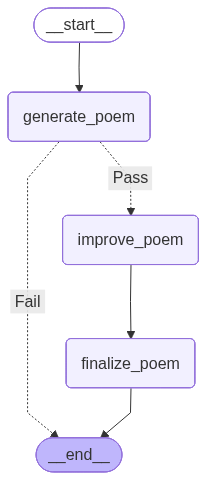

In [99]:
from IPython.display import Image, display
from agents.example1.Example2Agent import graph as ex2graph

image_data =ex2graph.get_graph().draw_mermaid_png()
display(Image(image_data))

When you debug in the LangSmit:

![TypedDict use for the state management](/assets/images/2025-09-06-Python_Type_Annotation/TypedDic_State_in_LangGraph.jpg)

[^1]: [Function Tools - Pydantic AI](https://ai.pydantic.dev/tools/){:target="_blank"}

[^2]: [8. Type Hints in Functions \| Fluent Python, 2nd Edition](https://learning.oreilly.com/library/view/fluent-python-2nd/9781492056348/ch08.html#dealing_with_none_sec){:target="_blank"}

[^3]: [5. Type Annotations \| Python in a Nutshell, 4th Edition](https://learning.oreilly.com/library/view/python-in-a/9781098113544/ch05.html#other_type_checkers){:target="_blank"}

[^4]: [pydantic/pydantic: Data validation using Python type hints](https://github.com/pydantic/pydantic){:target="_blank"}

[course_1]: https://learn.deeplearning.ai/accomplishments/3b751958-2e9b-4d13-a568-00d972faadb2?usp=sharing "Pydantic for LLM Workflows - DeepLearning.AI"

{:gtxt: .message color="green"}

{:rtxt: .message color="red"}